<a href="https://colab.research.google.com/github/cl0ud08/Capstone_Project/blob/main/TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [5]:
# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check for missing values in the dataset
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Basic statistics of numerical columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


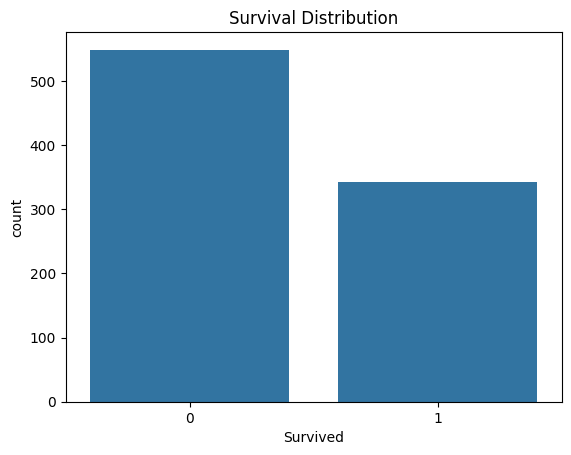

In [8]:
# Distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()


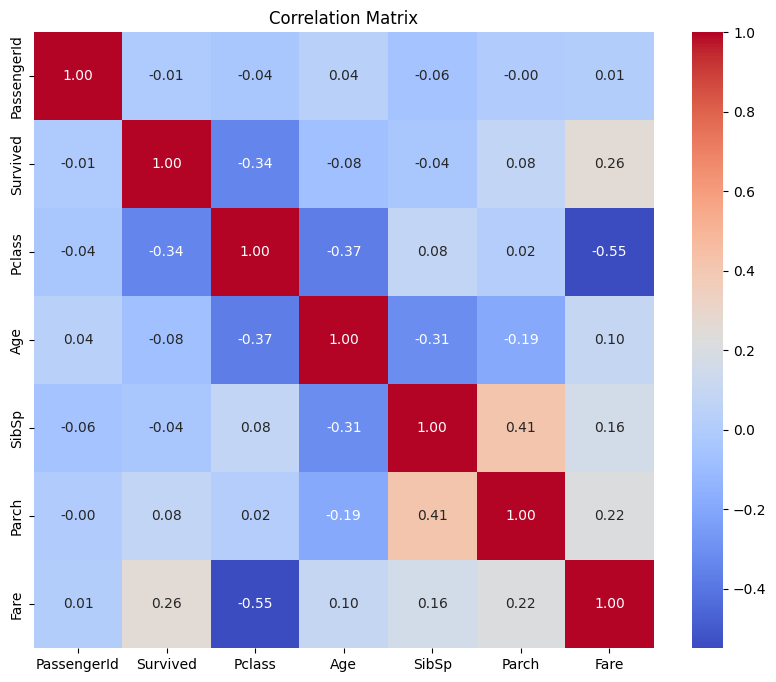

In [10]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


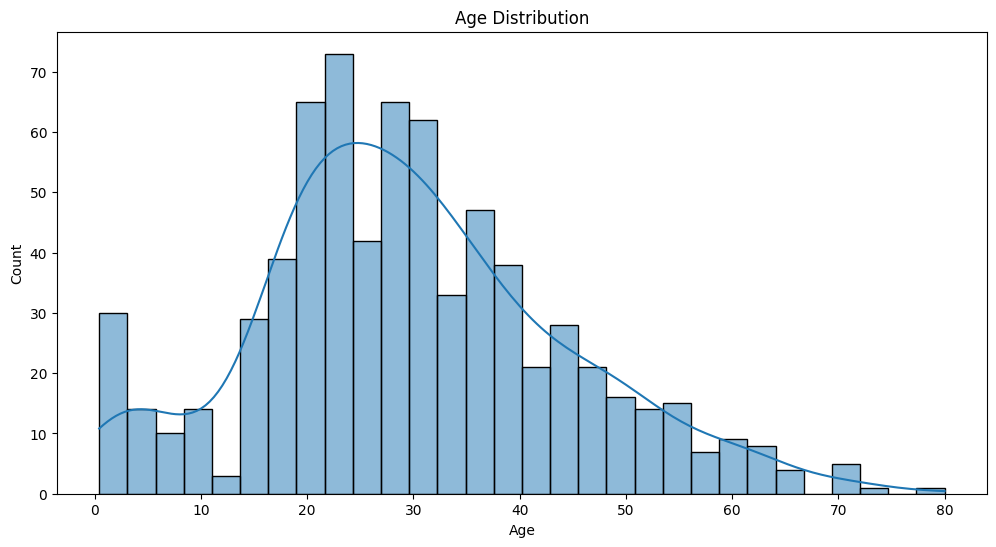

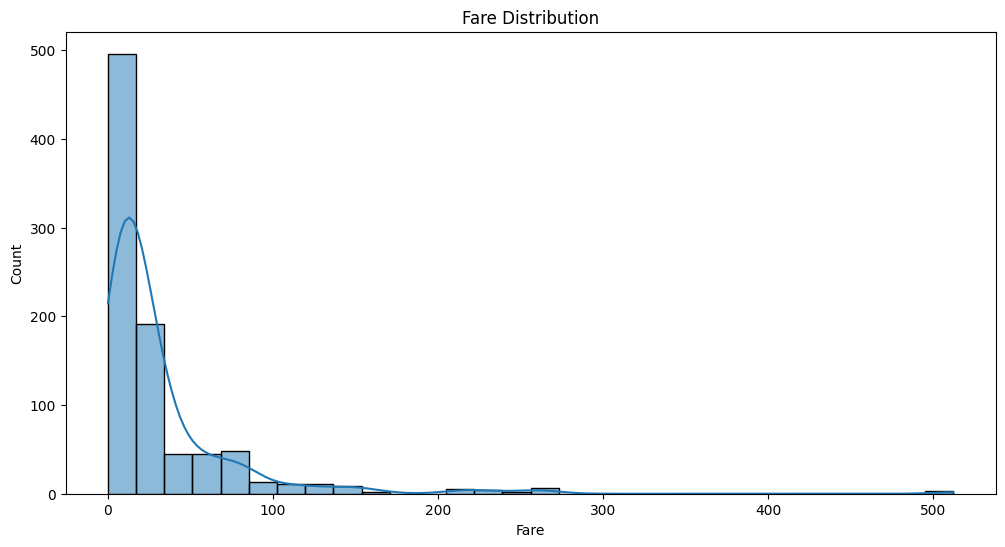

In [11]:
# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Distribution of Fare
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()


In [12]:
# Fill missing values for 'Age' with the median and 'Embarked' with the mode
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Check if there are any remaining missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [13]:
# One-hot encoding categorical columns 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows after encoding
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [14]:
# Scaling numerical features (Age and Fare)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Display the first few rows after scaling
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True


In [15]:
# Separate features (X) and target (y)
X = df.drop(columns='Survived')
y = df['Survived']


Accuracy of Logistic Regression after scaling: 80.45%


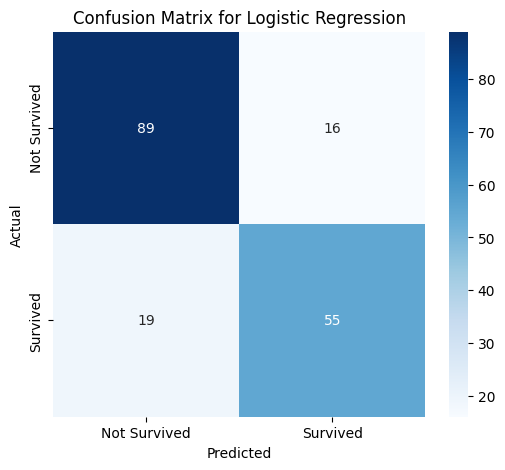

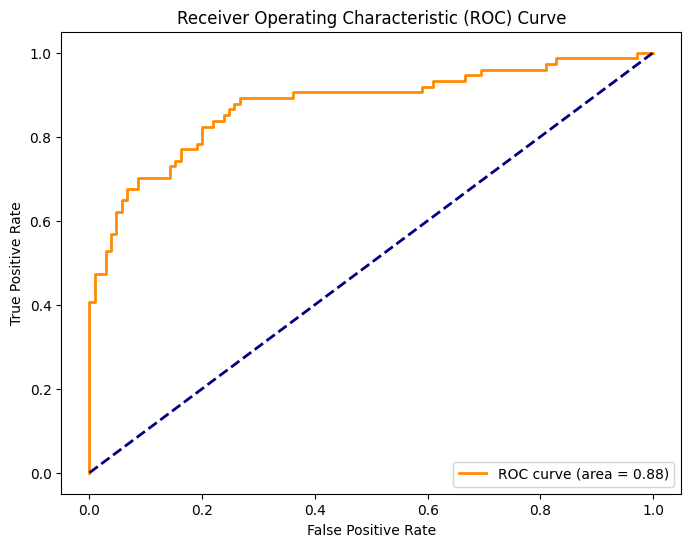

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Scale all numerical columns
scaler = StandardScaler()
numerical_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Re-split data into train and test sets after scaling
X = df.drop(columns='Survived')  # Features (excluding 'Survived')
y = df['Survived']  # Target: Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print Accuracy
print(f'Accuracy of Logistic Regression after scaling: {accuracy * 100:.2f}%')

# Visualize the results

# Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap for Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Mean Squared Error: 0.37
R-squared: 0.40


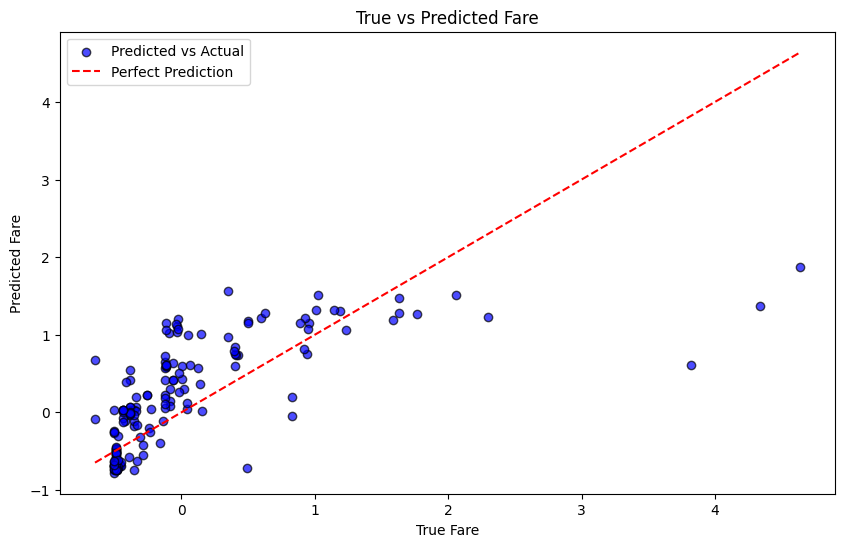

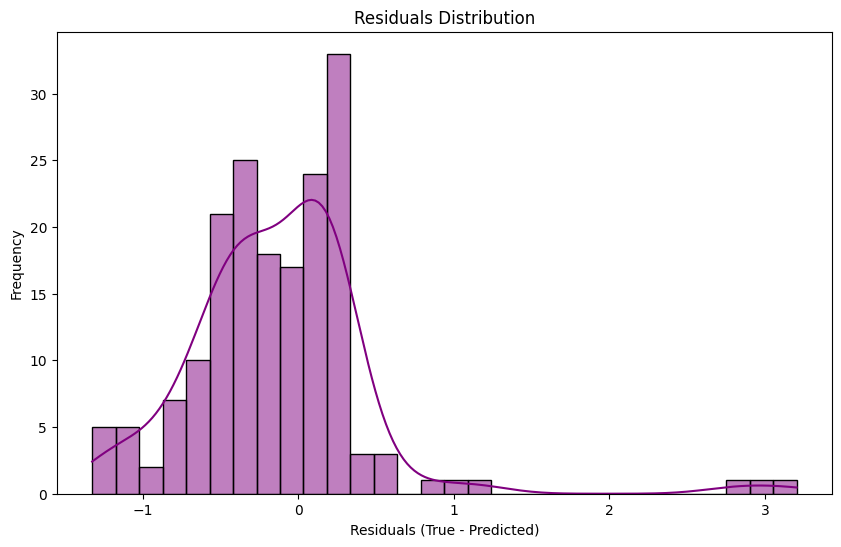

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (Fare) for regression
X = df.drop(columns=['Survived', 'Fare'])  # Features (excluding 'Fare' and 'Survived')
y = df['Fare']  # Target: Fare

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model for Fare prediction
lin_reg_model = LinearRegression()

# Fit the model on the training data
lin_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print MSE and R-squared
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualization of predictions vs true values
plt.figure(figsize=(10, 6))

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7, label='Predicted vs Actual')

# Line for perfect prediction (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('True Fare')
plt.ylabel('Predicted Fare')
plt.title('True vs Predicted Fare')

# Show legend
plt.legend()

# Display plot
plt.show()

# Residual plot (True - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))

# Residuals plot
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')

# Display plot
plt.show()



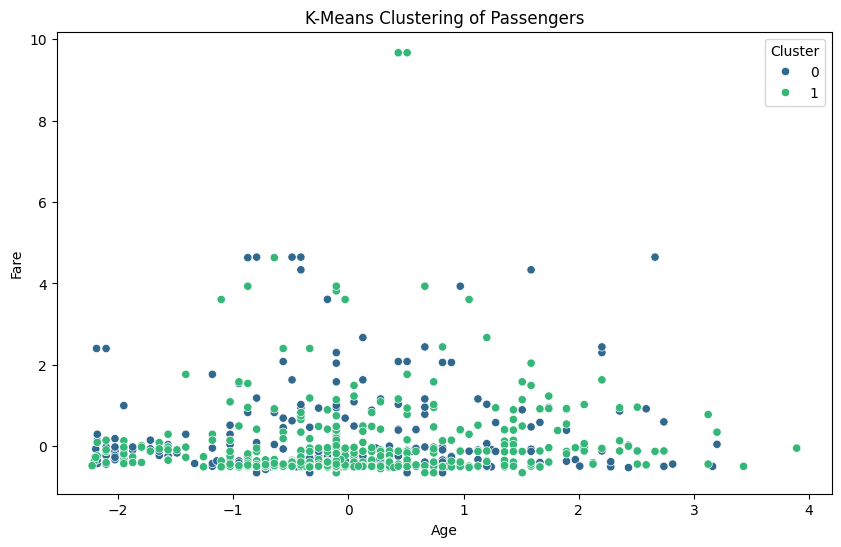

In [23]:
# K-Means Clustering (We choose 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters (using Age and Fare for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Passengers')
plt.show()
